In [1]:
#!pip install astroplan

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.coordinates import EarthLocation
from astropy.time import Time

Number of fields:  174


Text(0, 0.5, 'DEC (deg)')

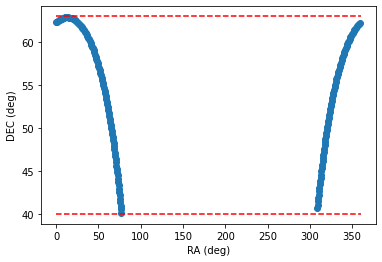

In [3]:
glat = 0.0
glon_start = 80
glon_end = 167
step = 0.5

print('Number of fields: ',int((glon_end-glon_start)/step))

ra = np.zeros(100)
dec = np.zeros(100)
glon = np.arange(glon_start,glon_end,step)

fields = SkyCoord(glon,glat,frame='galactic',unit='deg')
fields_ra = fields.fk5.ra
fields_dec = fields.fk5.dec

plt.scatter(fields_ra,fields_dec)
plt.plot([0.0,360.0],[63.0,63.0],'r--')
plt.plot([0.0,360.0],[40.0,40.0],'r--')
plt.xlabel('RA (deg)')
plt.ylabel('DEC (deg)')

In [4]:
from astroplan import Observer, FixedTarget
from astroplan import (AltitudeConstraint, AirmassConstraint, AtNightConstraint)
from astroplan.plots import plot_airmass
from astroplan import is_observable, is_always_observable, months_observable
from astroplan import download_IERS_A
download_IERS_A()

In [5]:
longitude = -2.0
latitude = +56.0
elevation = 30.0 * u.m
stand = EarthLocation.from_geodetic(longitude, latitude, elevation)
jgt = Observer(name='jgt',location=stand)
time = Time('2022-03-23 19:00:00')
constraints = [AltitudeConstraint(30*u.deg, 80*u.deg),AirmassConstraint(2), AtNightConstraint.twilight_civil()]

(0.9, 2.5)

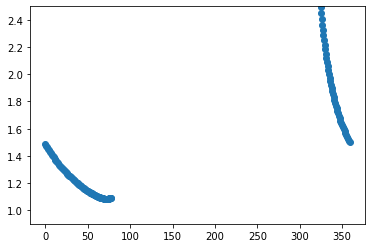

In [6]:
airmass = np.zeros(len(fields))
for i in np.arange(len(fields)):
     airmass[i] = jgt.altaz(time, fields[i]).secz
plt.scatter(fields_ra,airmass)
plt.ylim(0.9,2.5)

In [10]:
min_airmass = np.argmin(airmass)
bestfield_ra = fields_ra[min_airmass]
bestfield_dec = fields_dec[min_airmass]
best_field_string = bestfield_ra.to_string(u.hour) + ' ' + bestfield_dec.to_string(u.degree)

#print('Best field: ',best_field_string , ' at airmass ',airmass[min_airmass])
print("Best field {} ({:.1f}) at airmass {:.4f}"
     .format(fields[min_airmass].fk5.to_string("hmsdms",precision=2,format="unicode"),
            glon[min_airmass],
            airmass[min_airmass]))

Best field 04ʰ46ᵐ58.46ˢ +45°14′46.46″ (160.0) at airmass 1.0841


In [8]:
field_lon = 138.5
field_lat = 0.0
obs_time = "2022-03-23T19:00:00"

field = SkyCoord(field_lon,field_lat,frame='galactic',unit='deg',obstime=obs_time)

print("Field l{} is at {} (use JGT coords {})"
      .format(field_lon,
              field.fk5.to_string("hmsdms",precision=2,format="unicode"),
              field.fk5.to_string("hmsdms",fields=2,precision=2,format="unicode")))


Field l138.5 is at 02ʰ57ᵐ08.23ˢ +59°01′07.74″ (use JGT coords 02ʰ57ᵐ +59°01′)


In [16]:
star_ra = 48.8532
star_dec = 59.7329
obs_time = "2022-03-23T19:00:00"

star_coords = SkyCoord(star_ra*u.degree, star_dec*u.degree, obstime=obs_time)

print("Star coordinates {} in field approx {:.1f}"
     .format(star_coords.fk5.to_string("hmsdms",format="unicode",precision=2),
            star_coords.galactic.l))

Star coordinates 03ʰ15ᵐ24.77ˢ +59°43′58.43″ in field approx 140.2 deg
